In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
output_files = [ filename for filename in os.listdir('./optimization_folder/') \
                    if filename.startswith('run_libensemble_history')
                   and filename.endswith('.npy')]
assert len(output_files) == 1

x  = np.load( os.path.join('./optimization_folder/', output_files[0]) )
d = { label: x[label].flatten() for label in x.dtype.names if label not in ['x', 'x_on_cube'] }
df = pd.DataFrame(d)

In [3]:
df

,local_pt,returned,given_back,gen_worker,x0,given_time,sim_id,gen_time,x1,given,local_min,sim_worker,f
0,False,True,True,1,6.255330,1.602779e+09,0,1.602779e+09,10.804867,True,False,2,-160.192213
1,False,True,True,1,0.001716,1.602779e+09,1,1.602779e+09,4.534989,True,False,3,-36.532531
2,True,True,True,1,10.450463,1.602779e+09,2,1.602779e+09,10.804867,True,False,2,-51.900870
3,False,True,True,1,2.201338,1.602779e+09,3,1.602779e+09,1.385079,True,False,3,8.528124
4,True,True,True,1,6.255330,1.602779e+09,4,1.602779e+09,15.000000,True,False,2,-182.041608
5,False,True,True,1,2.793903,1.602779e+09,5,1.602779e+09,5.183411,True,False,3,49.243363
6,True,True,True,1,2.060197,1.602779e+09,6,1.602779e+09,10.804867,True,False,2,26.030406
7,False,True,True,1,5.951512,1.602779e+09,7,1.602779e+09,8.082251,True,False,3,-107.087355
8,True,True,True,1,6.255330,1.602779e+09,8,1.602779e+09,6.609735,True,False,2,-184.380979
9,False,True,True,1,6.287918,1.602779e+09,9,1.602779e+09,10.278293,True,False,3,-113.877809


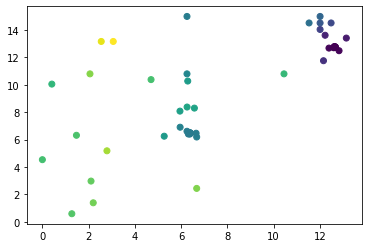

In [4]:
plt.scatter( df['x0'], df['x1'], c=df['f'])

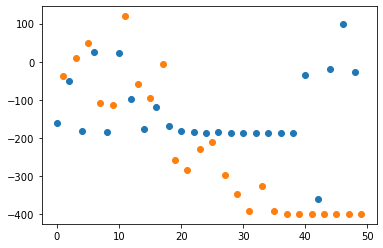

In [9]:
plt.plot(df['f'][df['sim_worker']==2], 'o')
plt.plot(df['f'][df['sim_worker']==3], 'o')